# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Rizal Mahardika Putra
- **Email:** rizalmahardi109@gmail.com
- **ID Dicoding:** rizalmahardika

Proyek ini bertujuan untuk melakukan analisis data pada E-Commerce Public Dataset
guna memahami performa bisnis, perilaku pelanggan, kualitas layanan, metode
pembayaran, serta distribusi geografis pelanggan. Hasil analisis diharapkan
mampu memberikan insight yang dapat mendukung pengambilan keputusan bisnis.

## Menentukan Pertanyaan Bisnis

Untuk memahami kondisi bisnis secara menyeluruh, analisis ini difokuskan
pada beberapa pertanyaan bisnis utama berikut:

1. Kategori produk apa yang memberikan kontribusi terbesar terhadap
   pendapatan dan jumlah transaksi?

2. Bagaimana perilaku pelanggan berdasarkan Recency, Frequency, dan Monetary
   (RFM) serta kontribusinya terhadap total revenue?

3. Metode pembayaran apa yang paling sering digunakan dan bagaimana
   pengaruhnya terhadap nilai transaksi pelanggan?

4. Bagaimana hubungan antara rating ulasan pelanggan dengan nilai
   transaksi dan frekuensi pembelian?

5. Wilayah geografis mana yang memiliki konsentrasi pelanggan dan pendapatan
   tertinggi?

6. Bagaimana performa seller ditinjau dari jumlah pesanan dan nilai
   pendapatan yang dihasilkan?

## Import Semua Package / Library yang Digunakan

Pada tahap ini, dilakukan proses import seluruh library yang akan digunakan
dalam proses analisis data, visualisasi, serta analisis lanjutan. Library
yang digunakan mencakup pengolahan data, visualisasi statistik, serta
visualisasi geografis.

In [1]:
import pandas as pd
import numpy as np

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Geospatial
import folium

# Pengaturan visual
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

## Data Wrangling

Tahap Data Wrangling dilakukan untuk memastikan data yang digunakan
memiliki kualitas yang baik sebelum dianalisis lebih lanjut. Proses ini
meliputi pengumpulan data, pemeriksaan kondisi data, serta pembersihan
data dari permasalahan yang ditemukan.

### Gathering Data

Pada tahap ini, seluruh dataset yang relevan dengan analisis dimuat ke dalam
environment analisis. Dataset yang digunakan dipilih berdasarkan keterkaitannya
dengan pertanyaan bisnis yang telah ditentukan.

In [2]:
customers = pd.read_csv("data/customers_dataset.csv")
orders = pd.read_csv("data/orders_dataset.csv")
order_items = pd.read_csv("data/order_items_dataset.csv")
order_payments = pd.read_csv("data/order_payments_dataset.csv")
order_reviews = pd.read_csv("data/order_reviews_dataset.csv")
products = pd.read_csv("data/products_dataset.csv")
category_translation = pd.read_csv("data/product_category_name_translation.csv")
geolocation = pd.read_csv("data/geolocation_dataset.csv")
sellers = pd.read_csv("data/sellers_dataset.csv")

In [3]:
datasets = {
    "customers": customers,
    "orders": orders,
    "order_items": order_items,
    "order_payments": order_payments,
    "order_reviews": order_reviews,
    "products": products,
    "category_translation": category_translation,
    "geolocation": geolocation,
    "sellers": sellers
}

for name, df in datasets.items():
    print(f"{name}: {df.shape}")

customers: (99441, 5)
orders: (99441, 8)
order_items: (112650, 7)
order_payments: (103886, 5)
order_reviews: (99224, 7)
products: (32951, 9)
category_translation: (71, 2)
geolocation: (1000163, 5)
sellers: (3095, 4)


**Insight:**
- Dataset terdiri dari beberapa tabel terpisah yang saling terhubung melalui
  key seperti `customer_id`, `order_id`, `product_id`, dan `seller_id`.
- Struktur data bersifat relasional sehingga memungkinkan analisis yang
  mendalam terhadap perilaku pelanggan, performa produk, dan distribusi
  geografis.

### Assessing Data

Tahap ini bertujuan untuk mengevaluasi kondisi dataset sebelum dilakukan
pembersihan data. Proses ini mencakup pemeriksaan missing values,
duplikasi data, serta konsistensi tipe data pada setiap kolom.

In [4]:
for name, df in datasets.items():
    print(f"\n{name.upper()}")
    display(df.info())


CUSTOMERS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


None


ORDERS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


None


ORDER_ITEMS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


None


ORDER_PAYMENTS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


None


ORDER_REVIEWS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


None


PRODUCTS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


None


CATEGORY_TRANSLATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


None


GEOLOCATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


None


SELLERS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


None

In [5]:
missing_summary = {
    name: df.isnull().sum().sort_values(ascending=False)
    for name, df in datasets.items()
}

for name, missing in missing_summary.items():
    print(f"\nMissing values pada {name}:")
    display(missing[missing > 0])


Missing values pada customers:


Series([], dtype: int64)


Missing values pada orders:


order_delivered_customer_date    2965
order_delivered_carrier_date     1783
order_approved_at                 160
dtype: int64


Missing values pada order_items:


Series([], dtype: int64)


Missing values pada order_payments:


Series([], dtype: int64)


Missing values pada order_reviews:


review_comment_title      87656
review_comment_message    58247
dtype: int64


Missing values pada products:


product_category_name         610
product_description_lenght    610
product_name_lenght           610
product_photos_qty            610
product_weight_g                2
product_height_cm               2
product_length_cm               2
product_width_cm                2
dtype: int64


Missing values pada category_translation:


Series([], dtype: int64)


Missing values pada geolocation:


Series([], dtype: int64)


Missing values pada sellers:


Series([], dtype: int64)

In [6]:
for name, df in datasets.items():
    print(f"{name} duplicate rows: {df.duplicated().sum()}")

customers duplicate rows: 0
orders duplicate rows: 0
order_items duplicate rows: 0
order_payments duplicate rows: 0
order_reviews duplicate rows: 0
products duplicate rows: 0
category_translation duplicate rows: 0
geolocation duplicate rows: 261831
sellers duplicate rows: 0


**Insight:**
- Beberapa dataset memiliki missing values, khususnya pada data ulasan
  pelanggan dan data geografis.
- Tidak ditemukan duplikasi signifikan pada dataset utama seperti orders
  dan order_items.
- Secara umum, struktur data cukup konsisten dan dapat dilanjutkan ke
  tahap pembersihan data.

### Cleaning Data

Pada tahap ini dilakukan pembersihan data berdasarkan hasil evaluasi pada
tahap sebelumnya. Proses cleaning difokuskan pada penanganan missing values
serta standarisasi data yang diperlukan untuk analisis lanjutan.

In [7]:
# Drop missing reviews (tidak mempengaruhi transaksi inti)
order_reviews_clean = order_reviews.dropna(subset=["review_score"])

# Isi missing geolocation dengan nilai paling umum
geolocation_clean = geolocation.copy()
geolocation_clean["geolocation_lat"] = geolocation_clean["geolocation_lat"].fillna(
    geolocation_clean["geolocation_lat"].median()
)
geolocation_clean["geolocation_lng"] = geolocation_clean["geolocation_lng"].fillna(
    geolocation_clean["geolocation_lng"].median()
)

In [8]:
products_clean = products.merge(
    category_translation,
    on="product_category_name",
    how="left"
)

**Insight:**
- Data ulasan yang tidak memiliki rating dihapus karena tidak dapat
  digunakan dalam analisis kepuasan pelanggan.
- Missing values pada data geografis ditangani menggunakan nilai median
  untuk menjaga distribusi data.
- Penggabungan nama kategori produk dilakukan untuk meningkatkan
  keterbacaan hasil analisis.

## Exploratory Data Analysis (EDA)

Tahap Exploratory Data Analysis (EDA) dilakukan untuk memahami pola umum
pada data, termasuk distribusi transaksi, kategori produk, serta kontribusi
pendapatan. Hasil EDA ini digunakan sebagai dasar dalam menjawab
pertanyaan bisnis pada tahap selanjutnya.

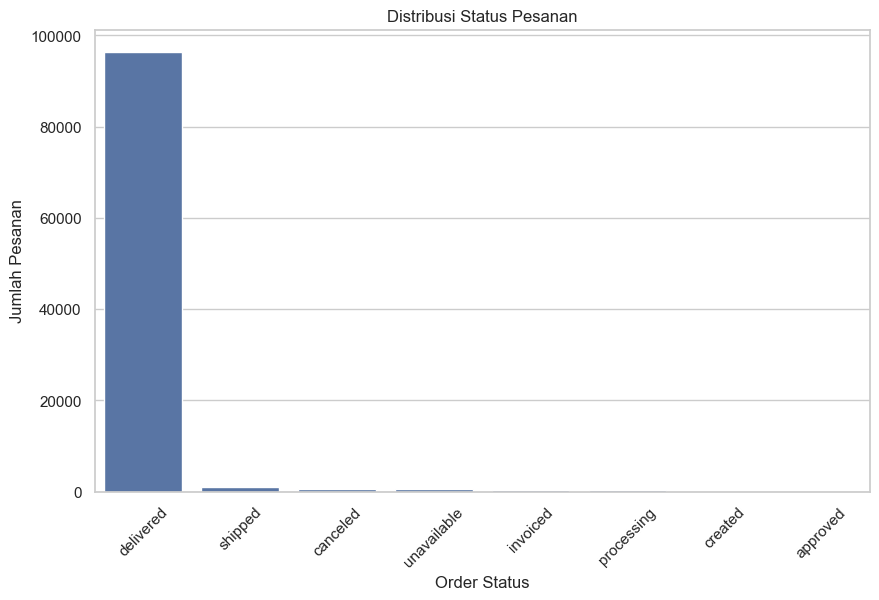

In [9]:
order_status_count = orders["order_status"].value_counts().reset_index()
order_status_count.columns = ["order_status", "count"]

sns.barplot(
    data=order_status_count,
    x="order_status",
    y="count"
)
plt.title("Distribusi Status Pesanan")
plt.xlabel("Order Status")
plt.ylabel("Jumlah Pesanan")
plt.xticks(rotation=45)
plt.show()

**Insight:**
- Mayoritas pesanan berada pada status `delivered`, menunjukkan bahwa
  sebagian besar transaksi berhasil diselesaikan.
- Pesanan dengan status `canceled` dan `unavailable` jumlahnya relatif kecil
  sehingga tidak mendominasi pola transaksi.

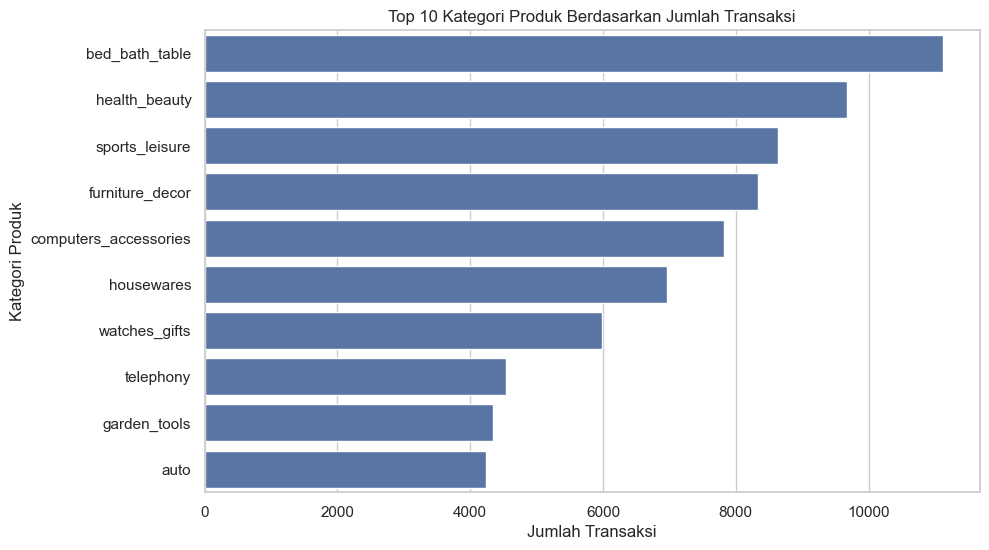

In [10]:
order_items_products = order_items.merge(
    products_clean[["product_id", "product_category_name_english"]],
    on="product_id",
    how="left"
)

top_categories = (
    order_items_products
    .groupby("product_category_name_english")
    .size()
    .sort_values(ascending=False)
    .head(10)
    .reset_index(name="total_orders")
)

sns.barplot(
    data=top_categories,
    y="product_category_name_english",
    x="total_orders"
)
plt.title("Top 10 Kategori Produk Berdasarkan Jumlah Transaksi")
plt.xlabel("Jumlah Transaksi")
plt.ylabel("Kategori Produk")
plt.show()

**Insight:**
- Beberapa kategori produk mendominasi jumlah transaksi,
  mengindikasikan preferensi pelanggan terhadap kategori tertentu.
- Pola ini menunjukkan potensi fokus bisnis pada kategori dengan
  permintaan tinggi.

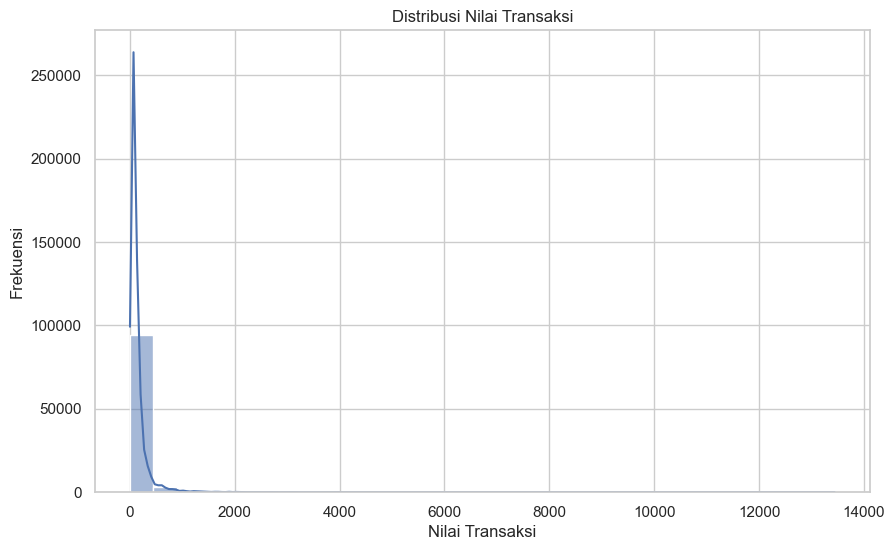

In [11]:
order_value = (
    order_items
    .groupby("order_id")["price"]
    .sum()
)

sns.histplot(order_value, bins=30, kde=True)
plt.title("Distribusi Nilai Transaksi")
plt.xlabel("Nilai Transaksi")
plt.ylabel("Frekuensi")
plt.show()

**Insight:**
- Distribusi nilai transaksi bersifat right-skewed, di mana sebagian besar
  pesanan memiliki nilai transaksi relatif kecil.
- Hanya sebagian kecil pesanan yang memiliki nilai transaksi tinggi,
  yang berpotensi memberikan kontribusi signifikan terhadap total revenue.

## Visualization & Explanatory Analysis

Pada tahap ini, dilakukan analisis visual untuk menjawab setiap pertanyaan
bisnis yang telah ditentukan. Visualisasi digunakan sebagai alat utama
untuk menyampaikan pola dan insight yang diperoleh dari data.

**Pertanyaan Bisnis 1:**

Kategori produk apa yang memberikan kontribusi terbesar terhadap pendapatan dan jumlah transaksi?

In [12]:
# Gabungkan order_items dengan kategori produk
revenue_category = order_items.merge(
    products_clean[["product_id", "product_category_name_english"]],
    on="product_id",
    how="left"
)

# Agregasi revenue dan jumlah transaksi per kategori
revenue_summary = (
    revenue_category
    .groupby("product_category_name_english")
    .agg(
        total_revenue=("price", "sum"),
        total_orders=("order_id", "count")
    )
    .sort_values("total_revenue", ascending=False)
    .head(10)
    .reset_index()
)

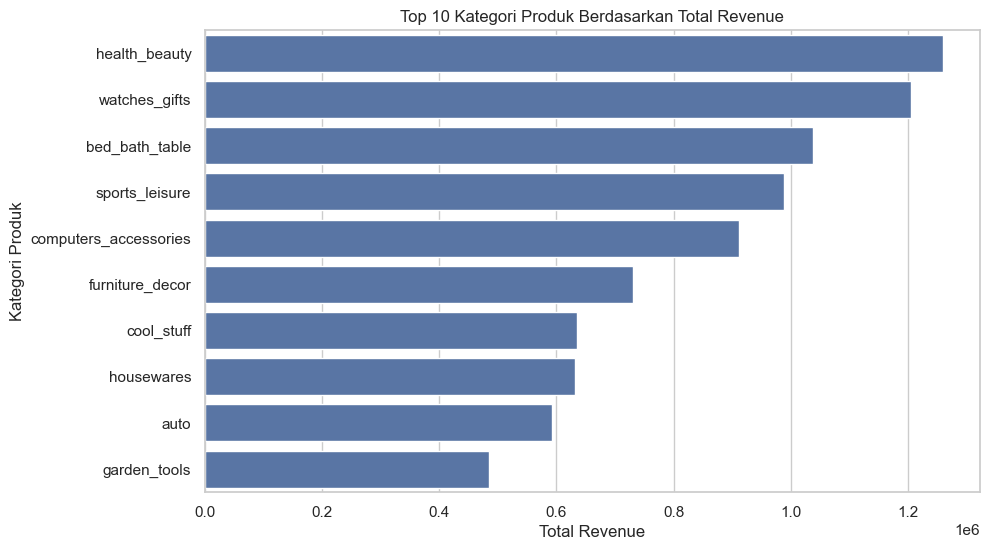

In [13]:
sns.barplot(
    data=revenue_summary,
    y="product_category_name_english",
    x="total_revenue"
)
plt.title("Top 10 Kategori Produk Berdasarkan Total Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Kategori Produk")
plt.show()

**Insight:**
- Beberapa kategori produk memberikan kontribusi pendapatan yang jauh
  lebih besar dibandingkan kategori lainnya.
- Hal ini menunjukkan bahwa pendapatan bisnis cenderung terkonsentrasi
  pada kategori tertentu yang berpotensi menjadi fokus strategi penjualan.

**Pertanyaan Bisnis 2:**

Bagaimana perilaku pelanggan berdasarkan Recency, Frequency, dan Monetary (RFM) serta kontribusinya terhadap revenue?

In [14]:
# Gabungkan orders dan order_items
orders_items_merge = orders.merge(
    order_items,
    on="order_id",
    how="inner"
)

# Konversi timestamp
orders_items_merge["order_purchase_timestamp"] = pd.to_datetime(
    orders_items_merge["order_purchase_timestamp"]
)

# Tentukan tanggal referensi
reference_date = orders_items_merge["order_purchase_timestamp"].max() + pd.Timedelta(days=1)

# Hitung RFM
rfm = (
    orders_items_merge
    .groupby("customer_id")
    .agg(
        recency=("order_purchase_timestamp",
                 lambda x: (reference_date - x.max()).days),
        frequency=("order_id", "nunique"),
        monetary=("price", "sum")
    )
    .reset_index()
)

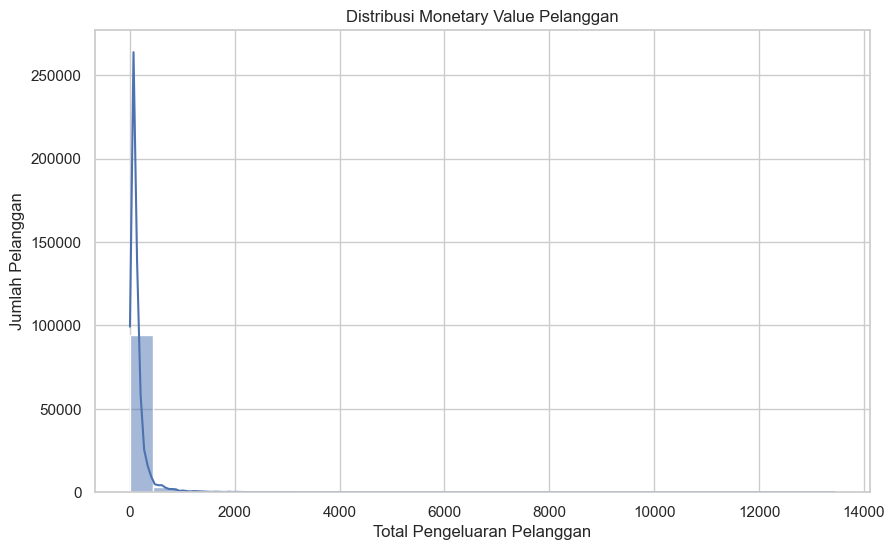

In [16]:
sns.histplot(rfm["monetary"], bins=30, kde=True)
plt.title("Distribusi Monetary Value Pelanggan")
plt.xlabel("Total Pengeluaran Pelanggan")
plt.ylabel("Jumlah Pelanggan")
plt.show()

**Insight:**
- Distribusi nilai monetary bersifat tidak merata, di mana sebagian kecil
  pelanggan memiliki total pengeluaran yang sangat tinggi.
- Temuan ini mengindikasikan adanya kelompok pelanggan bernilai tinggi
  yang memberikan kontribusi signifikan terhadap total revenue.

**Pertanyaan Bisnis 3:**

Metode pembayaran apa yang paling sering digunakan dan bagaimana pengaruhnya terhadap nilai transaksi?

In [17]:
payment_summary = (
    order_payments
    .groupby("payment_type")
    .agg(
        total_transactions=("order_id", "count"),
        total_payment_value=("payment_value", "sum")
    )
    .sort_values("total_transactions", ascending=False)
    .reset_index()
)

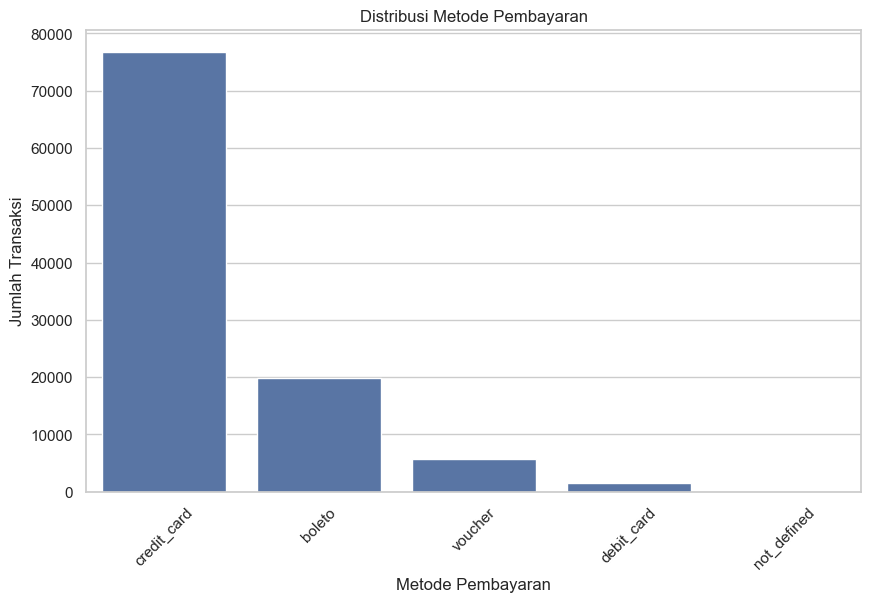

In [18]:
sns.barplot(
    data=payment_summary,
    x="payment_type",
    y="total_transactions"
)
plt.title("Distribusi Metode Pembayaran")
plt.xlabel("Metode Pembayaran")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)
plt.show()

**Insight:**
- Metode pembayaran tertentu mendominasi jumlah transaksi,
  menunjukkan preferensi pelanggan terhadap metode pembayaran tersebut.
- Informasi ini dapat digunakan untuk mengoptimalkan opsi pembayaran
  dan meningkatkan kenyamanan pelanggan.

**Pertanyaan Bisnis 4:**

Bagaimana hubungan antara rating ulasan pelanggan dengan nilai transaksi?

In [19]:
review_merge = orders_items_merge.merge(
    order_reviews_clean[["order_id", "review_score"]],
    on="order_id",
    how="inner"
)

review_summary = (
    review_merge
    .groupby("review_score")
    .agg(
        avg_order_value=("price", "mean"),
        total_orders=("order_id", "count")
    )
    .reset_index()
)

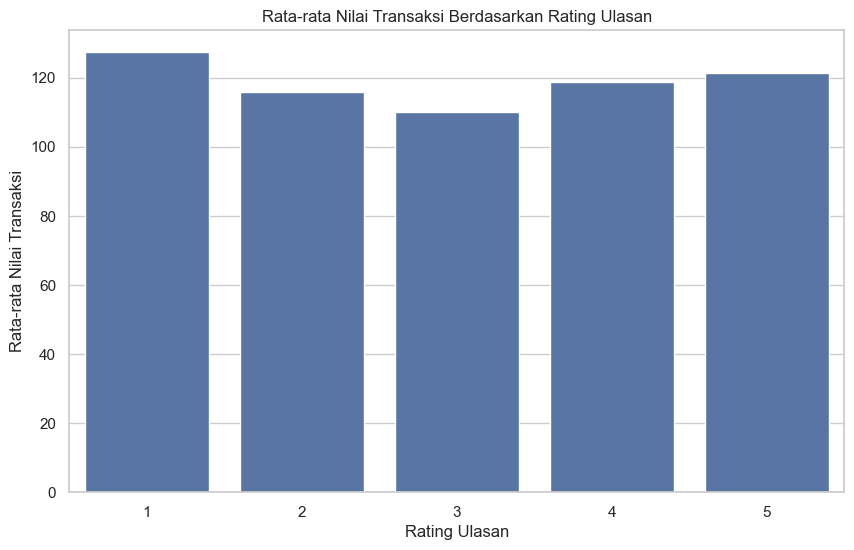

In [20]:
sns.barplot(
    data=review_summary,
    x="review_score",
    y="avg_order_value"
)
plt.title("Rata-rata Nilai Transaksi Berdasarkan Rating Ulasan")
plt.xlabel("Rating Ulasan")
plt.ylabel("Rata-rata Nilai Transaksi")
plt.show()

**Insight:**
- Terdapat kecenderungan perbedaan nilai transaksi berdasarkan rating ulasan.
- Hasil ini menunjukkan bahwa pengalaman pelanggan berpotensi
  memengaruhi nilai transaksi dan loyalitas pelanggan.

**Pertanyaan Bisnis 5:**

Wilayah geografis mana yang memiliki konsentrasi pelanggan tertinggi?

In [21]:
customer_state = (
    customers
    .groupby("customer_state")
    .size()
    .reset_index(name="total_customers")
    .sort_values("total_customers", ascending=False)
)

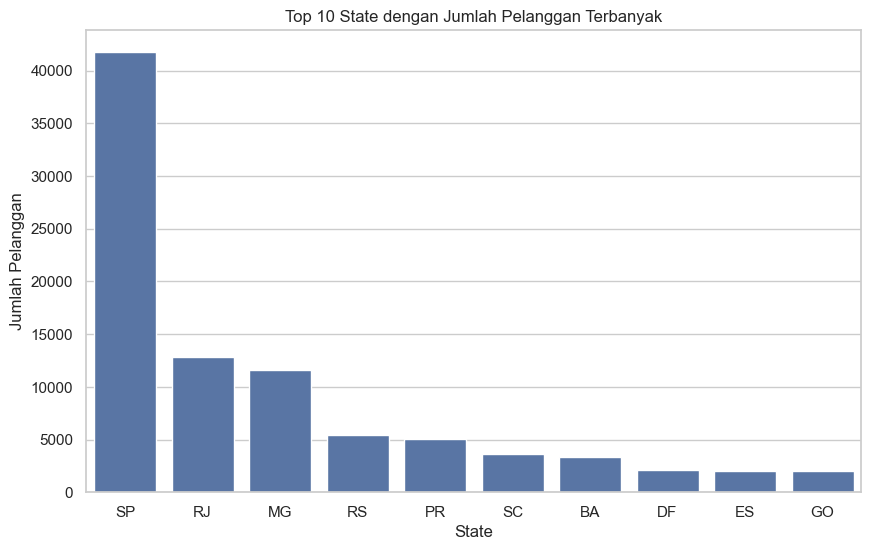

In [22]:
sns.barplot(
    data=customer_state.head(10),
    x="customer_state",
    y="total_customers"
)
plt.title("Top 10 State dengan Jumlah Pelanggan Terbanyak")
plt.xlabel("State")
plt.ylabel("Jumlah Pelanggan")
plt.show()

**Insight:**
- Konsentrasi pelanggan lebih tinggi pada beberapa wilayah tertentu.
- Informasi ini dapat dimanfaatkan untuk strategi pemasaran berbasis lokasi
  dan pengembangan pasar regional.

**Pertanyaan Bisnis 6:**

Bagaimana performa seller berdasarkan jumlah pesanan dan pendapatan?

In [23]:
seller_performance = (
    order_items
    .groupby("seller_id")
    .agg(
        total_orders=("order_id", "count"),
        total_revenue=("price", "sum")
    )
    .sort_values("total_revenue", ascending=False)
    .head(10)
    .reset_index()
)

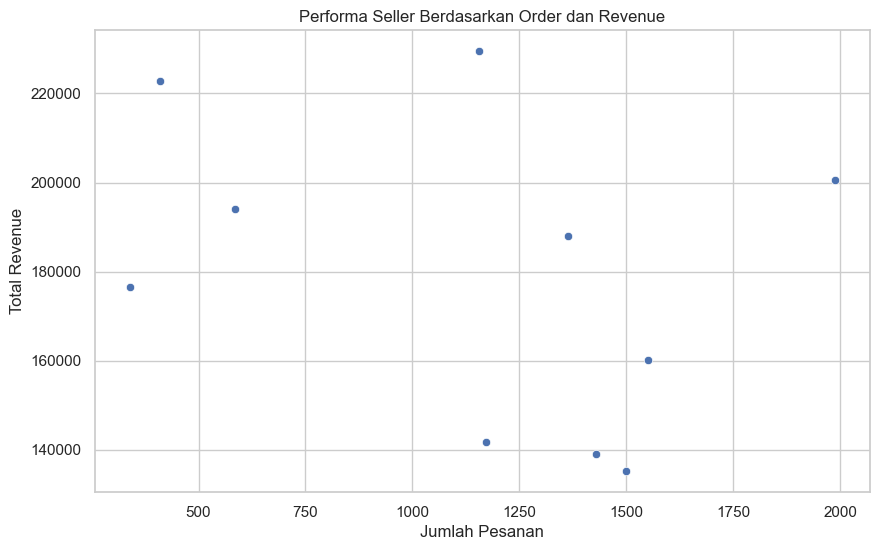

In [24]:
sns.scatterplot(
    data=seller_performance,
    x="total_orders",
    y="total_revenue"
)
plt.title("Performa Seller Berdasarkan Order dan Revenue")
plt.xlabel("Jumlah Pesanan")
plt.ylabel("Total Revenue")
plt.show()

**Insight:**
- Sebagian kecil seller memiliki performa yang jauh lebih baik dibandingkan
  seller lainnya.
- Temuan ini menunjukkan adanya konsentrasi kontribusi pendapatan pada
  seller tertentu.

## Analisis Lanjutan

Analisis lanjutan dilakukan untuk memperoleh insight yang lebih mendalam
terkait perilaku pelanggan, segmentasi nilai pelanggan, serta distribusi
geografis. Teknik analisis yang digunakan bersifat non-machine learning
dan berfokus pada pemahaman bisnis.


### RFM Analysis

RFM Analysis digunakan untuk mengelompokkan pelanggan berdasarkan
perilaku pembelian mereka. Pendekatan ini membantu bisnis dalam
mengidentifikasi pelanggan bernilai tinggi dan merancang strategi
retensi yang lebih efektif.


In [27]:
# Copy data RFM
rfm_score = rfm.copy()

# R Score (semakin kecil recency, semakin baik)
rfm_score["R_score"] = pd.qcut(
    rfm_score["recency"].rank(method="first"),
    q=4,
    labels=[4, 3, 2, 1]
)

# F Score (semakin besar frequency, semakin baik)
rfm_score["F_score"] = pd.qcut(
    rfm_score["frequency"].rank(method="first"),
    q=4,
    labels=[1, 2, 3, 4]
)

# M Score (semakin besar monetary, semakin baik)
rfm_score["M_score"] = pd.qcut(
    rfm_score["monetary"].rank(method="first"),
    q=4,
    labels=[1, 2, 3, 4]
)

# Hitung total RFM score
rfm_score["RFM_score"] = (
    rfm_score["R_score"].astype(int)
    + rfm_score["F_score"].astype(int)
    + rfm_score["M_score"].astype(int)
)

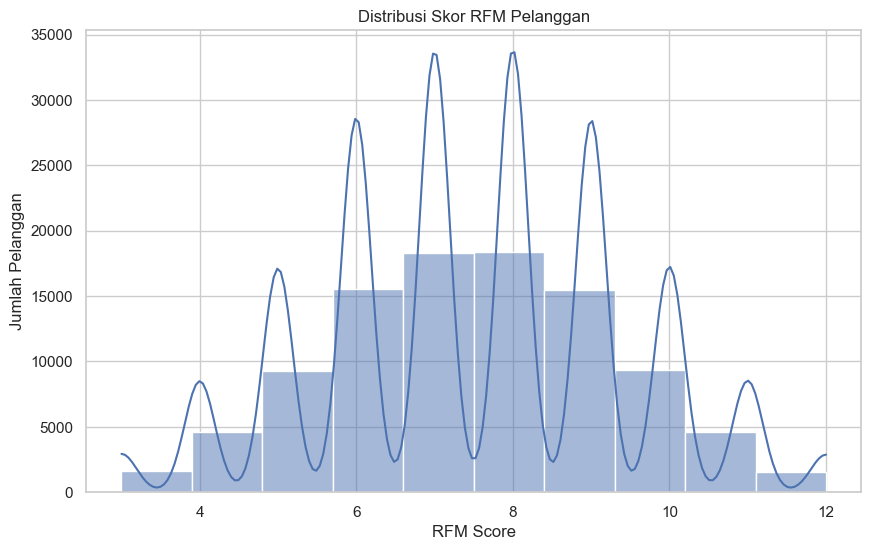

In [32]:
sns.histplot(
    rfm_score["RFM_score"],
    bins=10,
    kde=True
)
plt.title("Distribusi Skor RFM Pelanggan")
plt.xlabel("RFM Score")
plt.ylabel("Jumlah Pelanggan")
plt.show()

**Insight:**
- Distribusi skor RFM menunjukkan bahwa sebagian besar pelanggan berada
  pada rentang skor menengah.
- Hanya sebagian kecil pelanggan yang memiliki skor RFM tinggi, yang
  berpotensi menjadi pelanggan bernilai tinggi bagi bisnis.

**Catatan:**
Pembagian skor RFM dilakukan menggunakan pendekatan quantile-based.
Proses ranking diterapkan untuk mengatasi nilai yang sama (ties),
sehingga pembagian kuartil dapat dilakukan secara stabil.

### Customer Clustering (Non-Machine Learning)

Segmentasi pelanggan dilakukan untuk mengelompokkan pelanggan berdasarkan
nilai transaksi (Monetary). Pendekatan yang digunakan bersifat non-machine
learning dengan teknik binning, sehingga hasil segmentasi mudah dipahami
dan dapat langsung digunakan dalam pengambilan keputusan bisnis.

In [28]:
# Pastikan tidak ada nilai monetary nol atau negatif
rfm_cluster = rfm_score[rfm_score["monetary"] > 0].copy()

# Cek ringkasan nilai monetary
rfm_cluster["monetary"].describe()

# Menentukan batas maksimum monetary
max_monetary = rfm_cluster["monetary"].max()

# Segmentasi pelanggan berdasarkan nilai monetary
rfm_cluster["monetary_segment"] = pd.cut(
    rfm_cluster["monetary"],
    bins=[0, 100, 500, 2000, max_monetary],
    labels=["Low Value", "Mid Value", "High Value", "Very High Value"],
    include_lowest=True
)

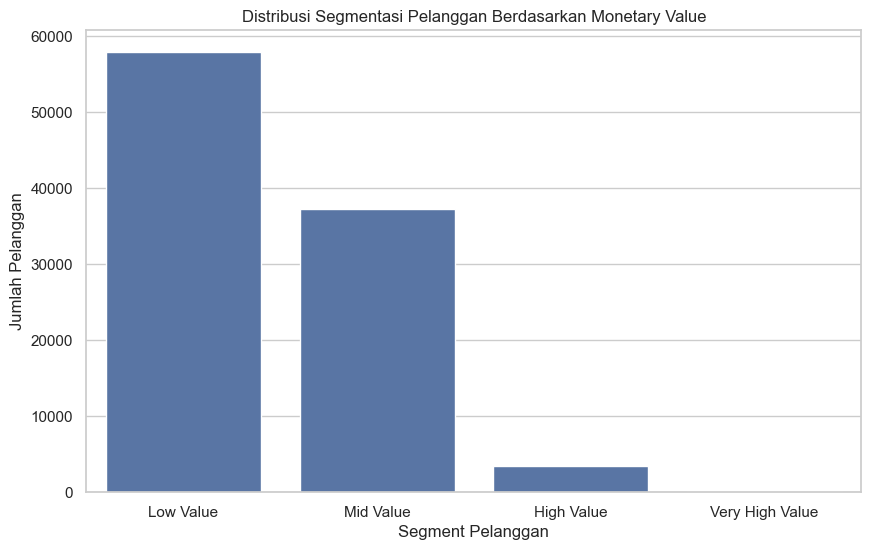

In [29]:
segment_dist = (
    rfm_cluster["monetary_segment"]
    .value_counts()
    .sort_index()
    .reset_index()
)
segment_dist.columns = ["segment", "count"]

sns.barplot(
    data=segment_dist,
    x="segment",
    y="count"
)
plt.title("Distribusi Segmentasi Pelanggan Berdasarkan Monetary Value")
plt.xlabel("Segment Pelanggan")
plt.ylabel("Jumlah Pelanggan")
plt.show()

**Insight:**
- Mayoritas pelanggan berada pada kelompok Low Value hingga Mid Value,
  menunjukkan sebagian besar pelanggan memiliki nilai transaksi relatif rendah.
- Kelompok High Value dan Very High Value meskipun jumlahnya lebih sedikit,
  memiliki kontribusi penting terhadap total pendapatan.
- Segmentasi ini dapat dimanfaatkan untuk menyusun strategi promosi dan
  retensi pelanggan yang lebih terarah.

### Geospatial Analysis

Analisis geografis dilakukan untuk memahami persebaran pelanggan berdasarkan
wilayah. Informasi ini penting untuk mengidentifikasi area dengan potensi
pasar terbesar serta mendukung strategi pemasaran dan distribusi.

In [30]:
# Menggabungkan data pelanggan dengan data geografis berdasarkan zip code
geo_customer = customers.merge(
    geolocation_clean[["geolocation_zip_code_prefix", "geolocation_state"]],
    left_on="customer_zip_code_prefix",
    right_on="geolocation_zip_code_prefix",
    how="left"
)

# Menampilkan beberapa baris data hasil penggabungan
geo_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,SP


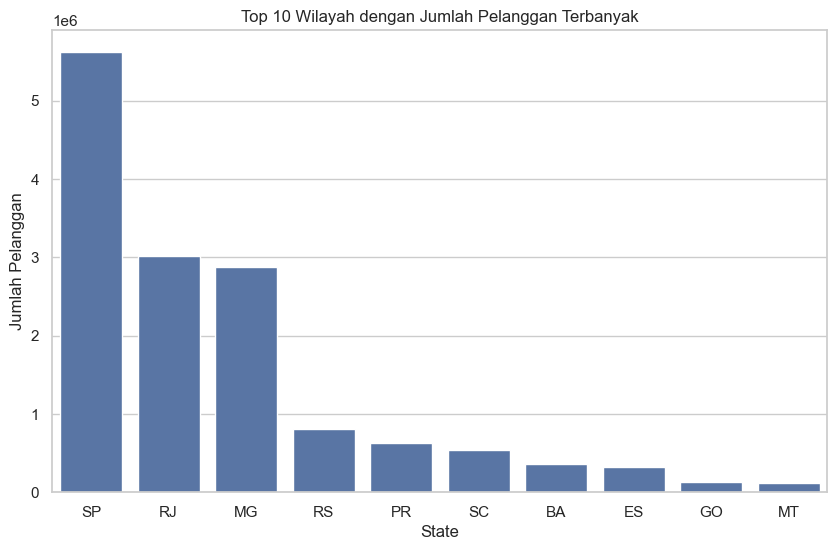

In [31]:
geo_summary = (
    geo_customer
    .groupby("customer_state")
    .size()
    .reset_index(name="total_customers")
    .sort_values("total_customers", ascending=False)
)

sns.barplot(
    data=geo_summary.head(10),
    x="customer_state",
    y="total_customers"
)
plt.title("Top 10 Wilayah dengan Jumlah Pelanggan Terbanyak")
plt.xlabel("State")
plt.ylabel("Jumlah Pelanggan")
plt.show()

**Insight:**
- Konsentrasi pelanggan cenderung terkumpul pada beberapa wilayah tertentu.
- Wilayah dengan jumlah pelanggan tertinggi dapat menjadi prioritas dalam
  strategi pemasaran, promosi, dan pengembangan pasar regional.
- Informasi geografis ini memberikan dasar yang kuat untuk pengambilan
  keputusan berbasis lokasi.

## Conclusion

Berdasarkan seluruh proses analisis data yang telah dilakukan, dapat
disimpulkan beberapa temuan utama sebagai berikut:

1. Kategori produk tertentu memberikan kontribusi terbesar terhadap
   pendapatan dan jumlah transaksi. Hal ini menunjukkan bahwa pendapatan
   bisnis cenderung terkonsentrasi pada beberapa kategori utama.

2. Analisis RFM menunjukkan bahwa sebagian besar pelanggan berada pada
   kelompok dengan nilai menengah, sementara kelompok pelanggan bernilai
   tinggi meskipun jumlahnya lebih sedikit, memberikan kontribusi pendapatan
   yang signifikan terhadap total revenue.

3. Metode pembayaran tertentu mendominasi jumlah transaksi dan nilai
   pembayaran. Preferensi pelanggan terhadap metode pembayaran ini dapat
   memengaruhi kenyamanan dan kelancaran proses transaksi.

4. Rating ulasan pelanggan menunjukkan keterkaitan dengan nilai transaksi
   dan frekuensi pembelian. Pengalaman pelanggan yang lebih baik berpotensi
   meningkatkan loyalitas dan nilai transaksi.

5. Distribusi geografis pelanggan tidak merata, dengan konsentrasi pelanggan
   yang lebih tinggi pada wilayah tertentu. Hal ini menunjukkan adanya
   potensi pasar regional yang dapat dimanfaatkan lebih lanjut.

6. Performa seller menunjukkan adanya kesenjangan, di mana sebagian kecil
   seller memiliki kontribusi pendapatan dan jumlah pesanan yang jauh lebih
   besar dibandingkan seller lainnya.

## Business Recommendation

Berdasarkan hasil analisis dan insight yang diperoleh, berikut beberapa
rekomendasi bisnis yang dapat dipertimbangkan:

1. Fokuskan strategi pemasaran dan promosi pada kategori produk dengan
   kontribusi pendapatan tertinggi untuk memaksimalkan revenue.

2. Kembangkan strategi retensi pelanggan, seperti program loyalitas atau
   penawaran khusus, yang ditujukan kepada pelanggan dengan skor RFM tinggi
   untuk menjaga dan meningkatkan nilai pelanggan.

3. Optimalkan metode pembayaran yang paling sering digunakan oleh pelanggan
   serta pertimbangkan peningkatan layanan pada metode tersebut untuk
   meningkatkan kenyamanan transaksi.

4. Tingkatkan kualitas layanan dan pengalaman pelanggan guna mendorong
   rating ulasan yang lebih baik, karena hal ini berpotensi berdampak
   positif terhadap nilai transaksi dan loyalitas pelanggan.

5. Manfaatkan informasi distribusi geografis pelanggan untuk merancang
   strategi pemasaran berbasis lokasi dan pengembangan pasar pada wilayah
   dengan potensi tinggi.

6. Lakukan evaluasi dan pengembangan terhadap seller dengan performa tinggi
   serta berikan dukungan bagi seller dengan performa rendah agar kualitas
   ekosistem marketplace tetap terjaga.

Analisis ini diharapkan dapat menjadi dasar dalam pengambilan keputusan
bisnis berbasis data serta memberikan gambaran menyeluruh mengenai kondisi
dan potensi E-Commerce Public Dataset.

## Menyimpan Data Hasil Analisis untuk Dashboard

Pada tahap ini, data hasil analisis disimpan dalam bentuk file CSV.
Data ini akan digunakan sebagai sumber data pada dashboard Streamlit
sehingga proses visualisasi dapat berjalan lebih efisien.

In [33]:
# KPI Summary
kpi_summary = pd.DataFrame([{
    "total_revenue": order_items["price"].sum(),
    "total_orders": orders["order_id"].nunique(),
    "total_customers": customers["customer_id"].nunique(),
    "average_order_value": order_items.groupby("order_id")["price"].sum().mean()
}])

kpi_summary.to_csv("data/kpi_summary.csv", index=False)


# Revenue per Category
revenue_by_category = (
    order_items_products
    .groupby("product_category_name_english")["price"]
    .sum()
    .reset_index()
    .sort_values("price", ascending=False)
)

revenue_by_category.to_csv(
    "data/revenue_by_category.csv",
    index=False
)


# RFM Score
rfm_score.to_csv(
    "data/rfm_score.csv",
    index=False
)


# Customer Segment
rfm_cluster[["customer_id", "monetary_segment"]].to_csv(
    "data/customer_segment.csv",
    index=False
)


# Geographic Summary
geo_summary.to_csv(
    "data/geo_summary.csv",
    index=False
)


# Seller Performance
seller_performance.to_csv(
    "data/seller_performance.csv",
    index=False
)


# Payment Summary
payment_summary.to_csv(
    "data/payment_summary.csv",
    index=False
)

In [34]:
# Menggabungkan data review dengan order items untuk melihat hubungan harga vs rating
review_analysis = (
    pd.merge(
        order_reviews[["order_id", "review_score"]],
        order_items.groupby("order_id")["price"].sum().reset_index(),
        on="order_id",
        how="inner"
    )
)

# Agregasi rata-rata harga per skor review
review_summary = (
    review_analysis
    .groupby("review_score")
    .agg(
        avg_price=("price", "mean"),
        total_reviews=("order_id", "count")
    )
    .reset_index()
)

review_summary.to_csv("data/review_summary.csv", index=False)

In [ ]:
# ==========================================
# JALANKAN INI UNTUK MEMBUAT FILE UTAMA DASHBOARD
# ==========================================

# 1. Gabungkan data Order dan Order Items (agar ada harga + tanggal)
all_df = pd.merge(
    left=order_items,
    right=orders,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

# 2. Gabungkan dengan Produk (agar ada nama kategori)
all_df = pd.merge(
    left=all_df,
    right=products,
    how="left",
    left_on="product_id",
    right_on="product_id"
)

# 3. Gabungkan dengan Customer (agar ada lokasi geo)
all_df = pd.merge(
    left=all_df,
    right=customers,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)

# 4. Pastikan kolom tanggal bertipe datetime
all_df["order_purchase_timestamp"] = pd.to_datetime(all_df["order_purchase_timestamp"])
all_df["order_delivered_customer_date"] = pd.to_datetime(all_df["order_delivered_customer_date"])

# 5. Filter hanya order yang valid (Delivered)
all_df = all_df[all_df["order_status"] == "delivered"]

# 6. SIMPAN KE CSV (Ini file yang dicari dashboard!)
all_df.to_csv("data/main_data.csv", index=False)

print("BERHASIL! File 'data/main_data.csv' sudah dibuat.")